### Visualize the information inside the dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Get the metadata
META = Path(".").resolve().parent.joinpath("metadata.csv")
df = pd.read_csv(META)

### Lets see what we're working with

##### Check for missing values

In [19]:
df.isnull().sum()

patientid    0
sex          0
age          0
finding      0
modality     0
filename     0
dtype: int64

##### Dataframe shape

In [20]:
df.shape

(94621, 6)

##### Dataframe columns

In [21]:
df.columns

Index(['patientid', 'sex', 'age', 'finding', 'modality', 'filename'], dtype='object')

##### Number of unique patients

In [22]:
df["patientid"].nunique()

2427

In [23]:
df2 = df.drop_duplicates(subset=['patientid'])

##### Function to annotate the graphs to show the number of instances

In [24]:
def annotate_graph(graph):
    for p in graph.patches:
        graph.annotate(str(p.get_width()),
                       (p.get_x() + p.get_width(), p.get_y()),
                       xytext=(5, 10),
                       textcoords="offset points")

##### Function to save figures

In [25]:
def save_figure(ax, filename):
    fig = ax.get_figure()
    fig.savefig(f"../images/{filename}.png")

##### Unique Patients

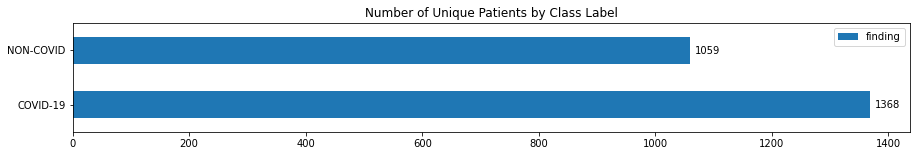

In [26]:
# Unique patients by class label
ax = df2["finding"].value_counts(dropna=True).plot.barh(y='Finding', legend = True, figsize = (15,2), title = 'Number of Unique Patients by Class Label')
annotate_graph(ax)
save_figure(ax, "Unique Patients by Class Label")

##### Unique Patients by Sex

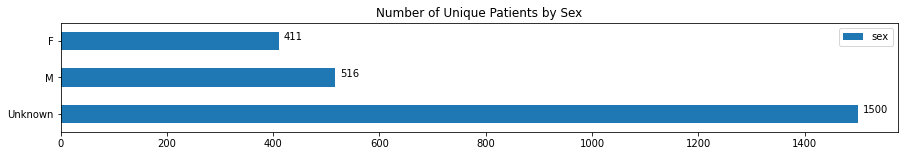

In [27]:
ax = df2["sex"].value_counts(dropna=True).plot.barh(y='Sex', legend = True, figsize = (15,2), title = 'Number of Unique Patients by Sex')
annotate_graph(ax)
save_figure(ax, "Unique Patients by Sex")

##### Unique Patients by Modality

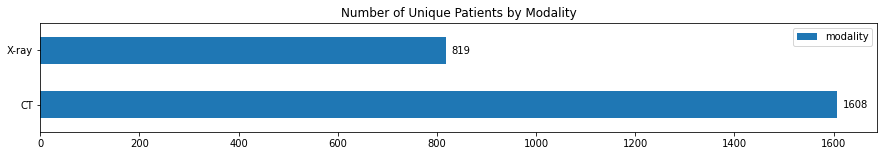

In [28]:
ax = df2["modality"].value_counts().plot.barh(y='Modality', legend = True, figsize = (15,2), title = 'Number of Unique Patients by Modality')
annotate_graph(ax)
save_figure(ax, "Unique Patients by Modality")

##### Dataset Distribution

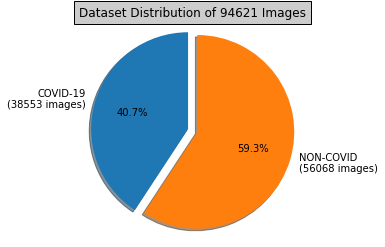

In [29]:
labels, counts = np.unique(df["finding"], return_counts=True)
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'NON-COVID')

fig, ax = plt.subplots()
ax.pie(counts, labels=[f"{label}\n({counts[index]} images)" for index, label in enumerate(labels)], explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f"Dataset Distribution of {sum(counts)} Images", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

save_figure(ax, "Dataset Distribution")